In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from scipy import stats
import joblib

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
diamonds = pd.read_csv('diamonds_preprocessed.csv')

In [ ]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,class,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,"(5000, 10000]",0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,"[0, 5000]",0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,"[0, 5000]",0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,"(5000, 10000]",0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,"[0, 5000]",0.066582
...,...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,"[0, 5000]",0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,"[0, 5000]",0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,"[0, 5000]",0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,"[0, 5000]",0.080874


In [ ]:
price_classes = ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
feature_names = diamonds.columns.to_list()
feature_names.remove('class')
feature_names

['carat', 'clarity', 'color', 'cut', 'depth', 'table', 'x', 'y', 'z', 'volume']

In [ ]:
class_to_num = {'[0, 5000]' : 0, '(5000, 10000]' : 1, '(10000, 15000]' : 2, '15000+' : 3}
num_to_class =  {0 : '[0, 5000]', 1 : '(5000, 10000]', 2 : '(10000, 15000]', 3 :'15000+'}

In [ ]:
def to_num(y):
  temp = []
  temp_index = y.index
  for i in y:
    temp.append(class_to_num[i])
  return pd.Series(temp, index=temp_index, name='class')

def to_cat(y):
  temp = []
  temp_index = y.index
  for i in y:
    temp.append(num_to_class[i])
  return pd.Series(temp, index=temp_index, name='class')

In [ ]:
X = diamonds[feature_names]
y = diamonds['class']

In [ ]:
X

,carat,clarity,color,cut,depth,table,x,y,z,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,0.066582
...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,0.080874


In [ ]:
y

0        (5000, 10000]
1            [0, 5000]
2            [0, 5000]
3        (5000, 10000]
4            [0, 5000]
             ...      
52325        [0, 5000]
52326        [0, 5000]
52327        [0, 5000]
52328        [0, 5000]
52329        [0, 5000]
Name: class, Length: 52330, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
y_encoded = to_num(y)

In [ ]:
y_test_encoded = to_num(y_test)

***

### Modeli

In [ ]:
dtc = joblib.load('DTC.pkl')
knn = joblib.load('KNN.pkl')
mlp = joblib.load('MLP.pkl')
cnb = joblib.load('CNB.pkl')
rfc = joblib.load('RFC.pkl')
xgb = joblib.load('XGB.pkl')

In [ ]:
models = [dtc, knn, mlp, cnb, rfc, xgb]
model_names = [type(model.named_steps['model']).__name__ for model in models]

In [ ]:
model_names

['DecisionTreeClassifier',
 'KNeighborsClassifier',
 'MLPClassifier',
 'CategoricalNB',
 'RandomForestClassifier',
 'XGBClassifier']

### Accuracy

In [ ]:
model_scores = []
for i, model in enumerate(models):
  if model_names[i] == 'XGBClassifier':
    scores = cross_val_score(model, X, y_encoded, cv=5, scoring='accuracy')
    model_scores.append(scores)
  else:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    model_scores.append(scores)

In [ ]:
model_scores

[array([0.93951844, 0.94009173, 0.94095165, 0.94076056, 0.94458246]),
 array([0.94448691, 0.94601567, 0.94563348, 0.94897764, 0.95136633]),
 array([0.94391363, 0.94716224, 0.94639786, 0.94783107, 0.95260845]),
 array([       nan,        nan,        nan, 0.83623161, 0.83709153]),
 array([0.94907319, 0.95308618, 0.95060195, 0.95365947, 0.95719473]),
 array([0.94964647, 0.9506975 , 0.95203516, 0.95442385, 0.95537932])]

CategoricalNB iz nekog razloga daje NaN na cross_validation pa cemo uzeti najgori skor i staviti ga kao rezultat svuda, ionako je model najgoreg performansa.

In [ ]:
model_scores[3] = np.array([0.83623161 for n in range(5)])
model_scores

[array([0.93951844, 0.94009173, 0.94095165, 0.94076056, 0.94458246]),
 array([0.94448691, 0.94601567, 0.94563348, 0.94897764, 0.95136633]),
 array([0.94391363, 0.94716224, 0.94639786, 0.94783107, 0.95260845]),
 array([0.83623161, 0.83623161, 0.83623161, 0.83623161, 0.83623161]),
 array([0.94907319, 0.95308618, 0.95060195, 0.95365947, 0.95719473]),
 array([0.94964647, 0.9506975 , 0.95203516, 0.95442385, 0.95537932])]

In [ ]:
accuracy_scores = []
for scores in model_scores:
  accuracy_scores.append(scores.mean())
accuracy_scores

[0.9411809669405695,
 0.9472960061150392,
 0.9475826485763423,
 0.8362316100000001,
 0.952723103382381,
 0.9524364609210778]

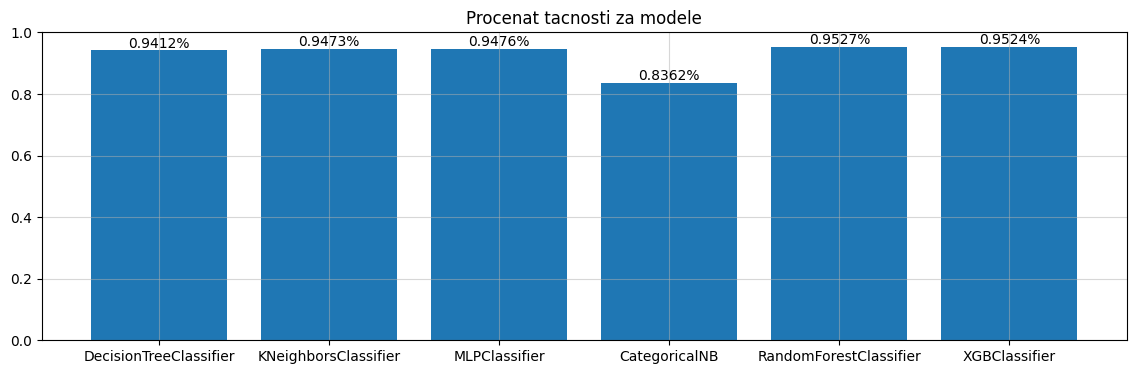

In [ ]:
plt.figure(figsize=(14, 4))
plt.bar(model_names, accuracy_scores)
plt.grid(alpha=0.5)
for i, s in enumerate(accuracy_scores):
    plt.text(model_names[i], s, f'{s:.4f}%', ha='center', va='bottom')
plt.title('Procenat tacnosti za modele')
plt.show()

Svi modeli daju zadovoljavajuce rezultate osim Bayesa.
Najbolji su **RandomForestClassifier** i **XGBClassifier**, sto je i ocekivano od *ensemble* modela.

### Precision score

Preciznost je metrika koja predstavlja odnos tacno pozitivno klasifikovanih instanci prema zbiru tacno pozitivno i lazno pozitivno klasifikovanih instanci.


In [ ]:
precision_scores = []
for i, model in enumerate(models):
  y_pred = model.predict(X_test)
  if model_names[i] == 'XGBClassifier':
    precision_scores.append(precision_score(y_test_encoded, y_pred, average='weighted'))
  else:
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))

precision_scores

[0.9690924202983734,
 0.9459011975129988,
 0.9509133781657728,
 0.8811344359519568,
 0.9867584485764168,
 0.964745199963631]

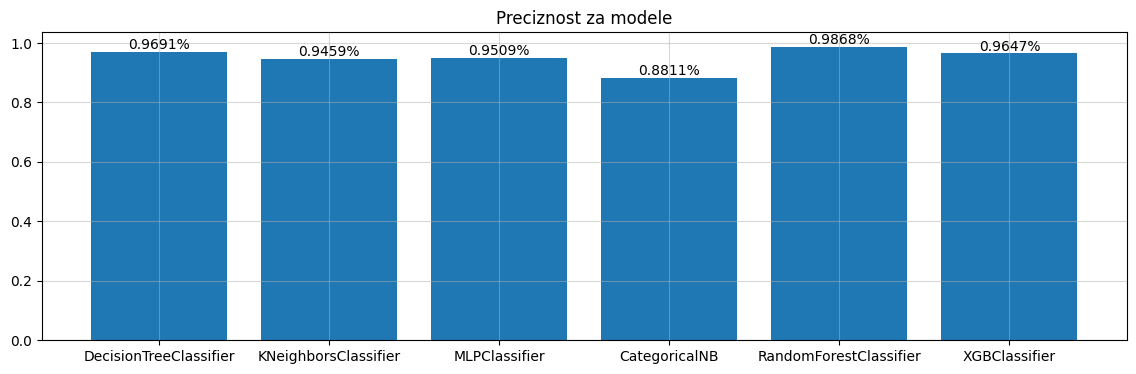

In [ ]:
plt.figure(figsize=(14, 4))
plt.bar(model_names, precision_scores)
plt.grid(alpha=0.5)
for i, s in enumerate(precision_scores):
    plt.text(model_names[i], s, f'{s:.4f}%', ha='center', va='bottom')
plt.title('Preciznost za modele')
plt.show()

### Recall score

Odziv predstavlja odnos tacno pozitivno klasifikovanih instanci prema zbiru tacno pozitivno klasifikovanih i lazno negativno klasifikovanih instanci. Odziv meri sposobnost modela da pravilno identifikuje sve pozitivne instance.


In [ ]:
recall_scores = []
for i, model in enumerate(models):
  y_pred = model.predict(X_test)
  if model_names[i] == 'XGBClassifier':
    recall_scores.append(recall_score(y_test_encoded, y_pred, average='weighted'))
  else:
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))

recall_scores

[0.9677049493598319,
 0.9455379323523792,
 0.949742021784827,
 0.8380788585260208,
 0.9867507484553156,
 0.9644563347983948]

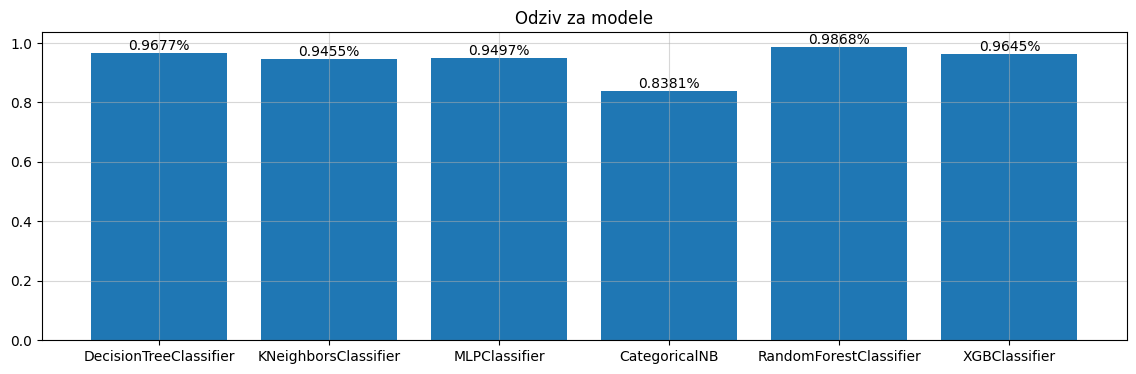

In [ ]:
plt.figure(figsize=(14, 4))
plt.bar(model_names, recall_scores)
plt.grid(alpha=0.5)
for i, s in enumerate(recall_scores):
    plt.text(model_names[i], s, f'{s:.4f}%', ha='center', va='bottom')
plt.title('Odziv za modele')
plt.show()

Mozemo primetiti da su *accuracy_score* i *recall_score* jednaki za svaki od 6 modela.

Ako su rezultati preciznosti i odziva jednaki za model, to znaci da je model postigao istu performansu u pogledu tacnog identifikovanja pozitivnih instanci i ukupne tacnosti svojih predvidjanja.

### F1 score

 F1-skor je harmonicna sredina preciznosti i odziva. On kombinuje informacije o tacnosti modela u klasifikaciji pozitivnih i negativnih instanci.


In [ ]:
f1_scores = []
for i, model in enumerate(models):
  y_pred = model.predict(X_test)
  if model_names[i] == 'XGBClassifier':
    f1_scores.append(f1_score(y_test_encoded, y_pred, average='weighted'))
  else:
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

f1_scores

[0.9681705484284868,
 0.9456956585787996,
 0.9502239214482163,
 0.828374870750645,
 0.9867528931521908,
 0.9645667296543091]

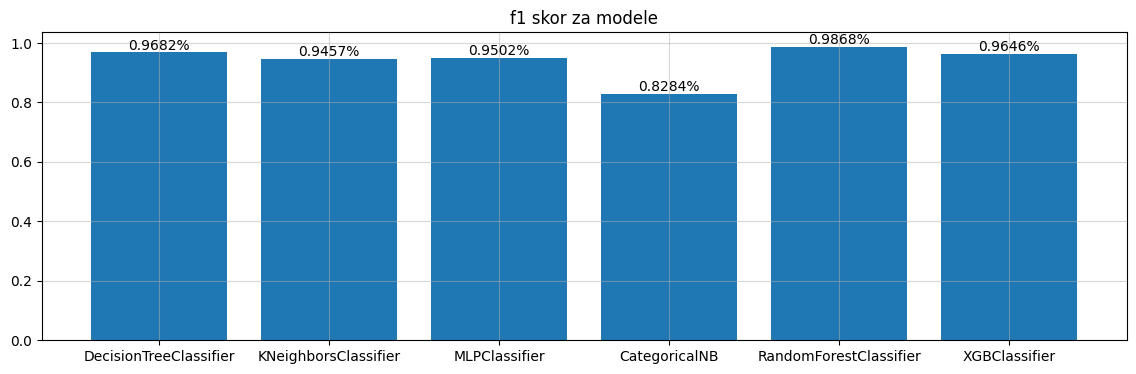

In [ ]:
plt.figure(figsize=(14, 4))
plt.bar(model_names, f1_scores)
plt.grid(alpha=0.5)
for i, s in enumerate(f1_scores):
    plt.text(model_names[i], s, f'{s:.4f}%', ha='center', va='bottom')
plt.title('f1 skor za modele')
plt.show()

Od svih modela **RandomForestClassifier** pokazuje najbolje ocene.

## Medjusobna poredjenja modela

### Paired t-test

Upareni t-test je statisticka metoda koja se koristi za uporedjivanje prosecnih vrednosti iz dve grupe merenja koje su medjusobno povezane ili uparene. Ova metoda se koristi kada se isti subjekti mere u dve razlicite situacije, ili kada se isti subjekti mere pre i posle intervencije. Cilj uparenog t-testa je da se utvrdi da li postoji statisticki znacajna razlika izmedju prosecnih vrednosti u parovima merenja.

Rezultat uparenog t-testa je vrednost t-statistike, koja se koristi za odredjivanje da li postoji statisticki znacajna razlika izmedju dve grupe merenja. Takodje se izracunava p-vrednost, koja predstavlja verovatnocu da se dobije razlika u prosecnim vrednostima kao ili veca od one koju smo posmatrali, ako su grupe zaista iste. Ako je p-vrednost manja od unapred odabrane statisticke znacajnosti (najcesce 0,05), smatra se da postoji statisticki znacajna razlika izmedju grupa.



In [ ]:
from itertools import combinations

In [ ]:
ids = [0, 1, 2, 3, 4, 5]
pairs = list(combinations(ids, 2))

In [ ]:
def paired_t_test(model1_scores, model2_scores, metric):
    t_statistic, p_value = stats.ttest_rel(model1_scores, model2_scores)

    if p_value < 0.05:
        significance = "Statistically significant"
    else:
        significance = "Not statistically significant"
    
    results = {
        'metric': metric,
        't_statistic': t_statistic,
        'p_value': p_value,
        'significance': significance
    }
    
    return results

In [ ]:
t_test_scores = []
for pair in pairs:
  i = pair[0]
  j = pair[1]
  res = paired_t_test(model_scores[i], model_scores[j], 'accuracy')
  t_test_scores.append(res)


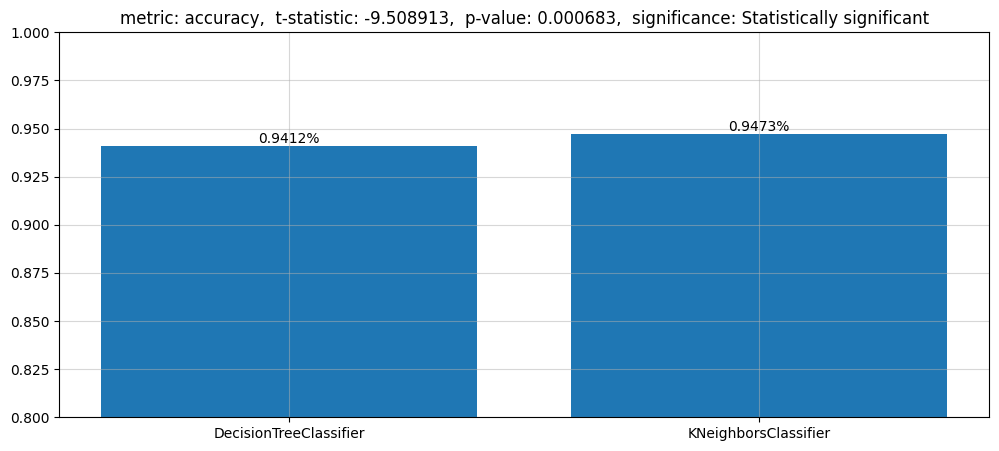

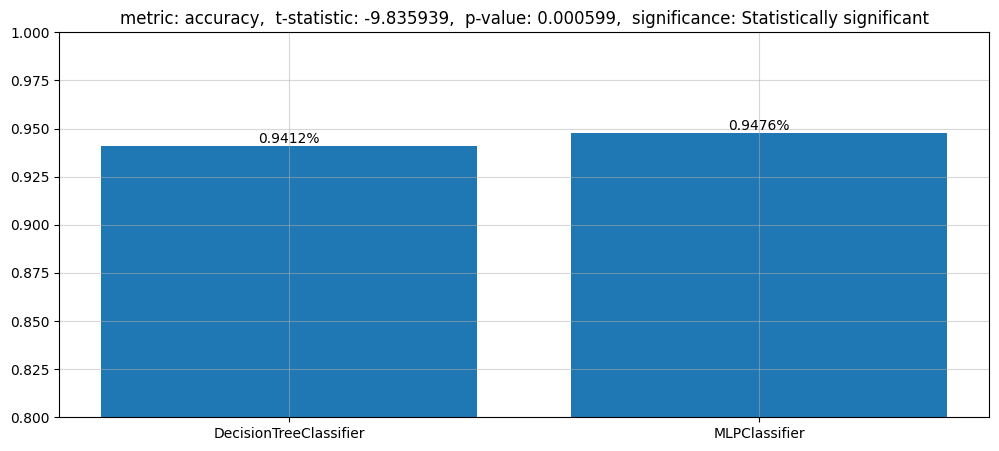

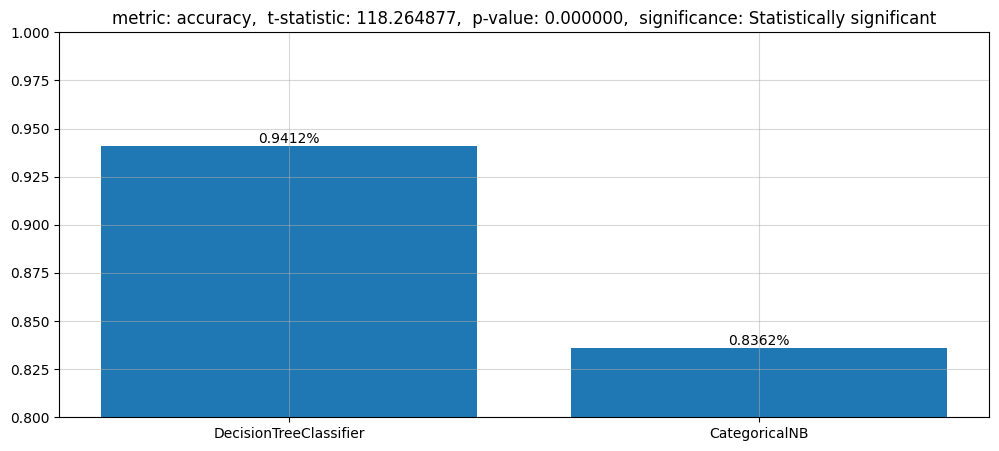

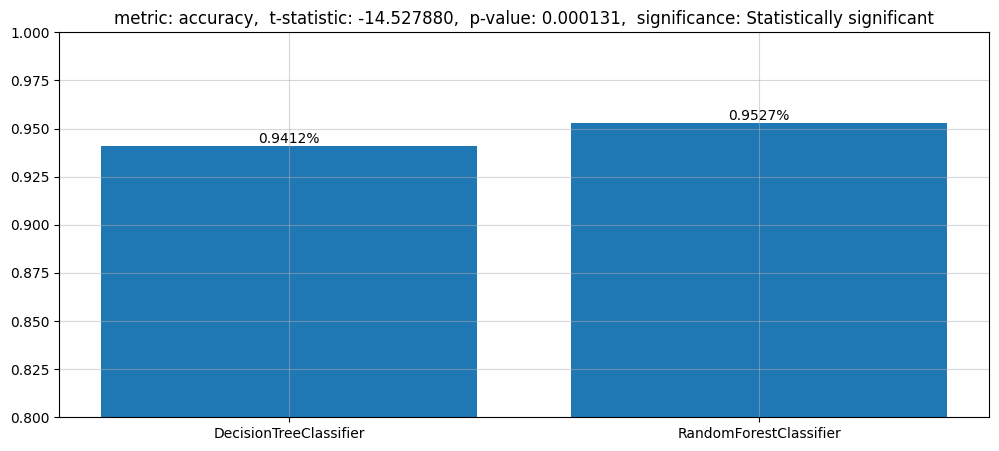

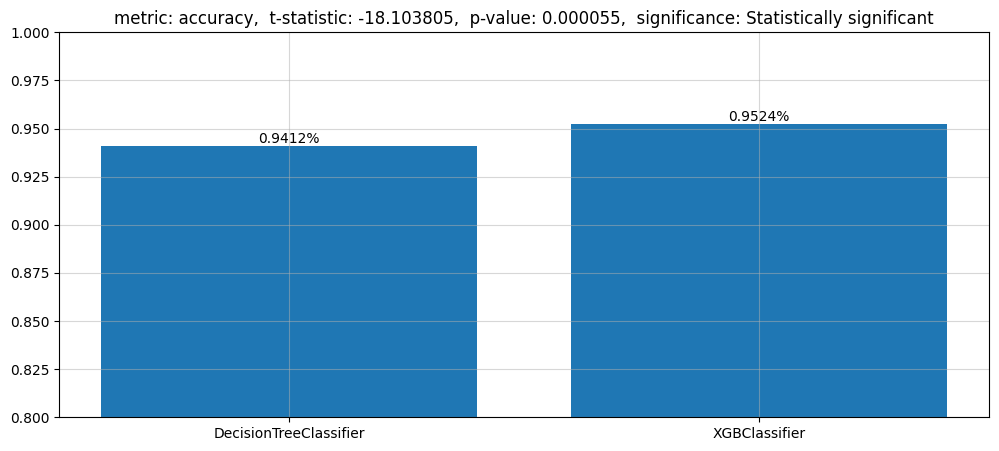

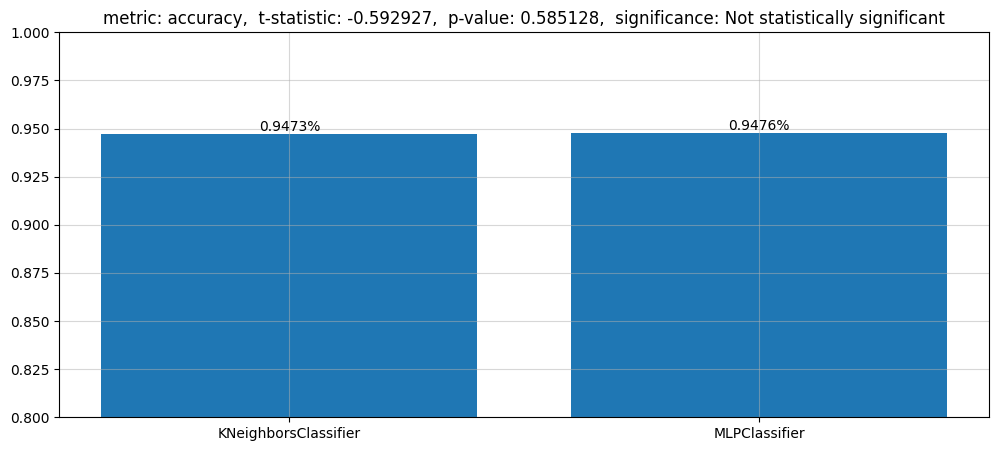

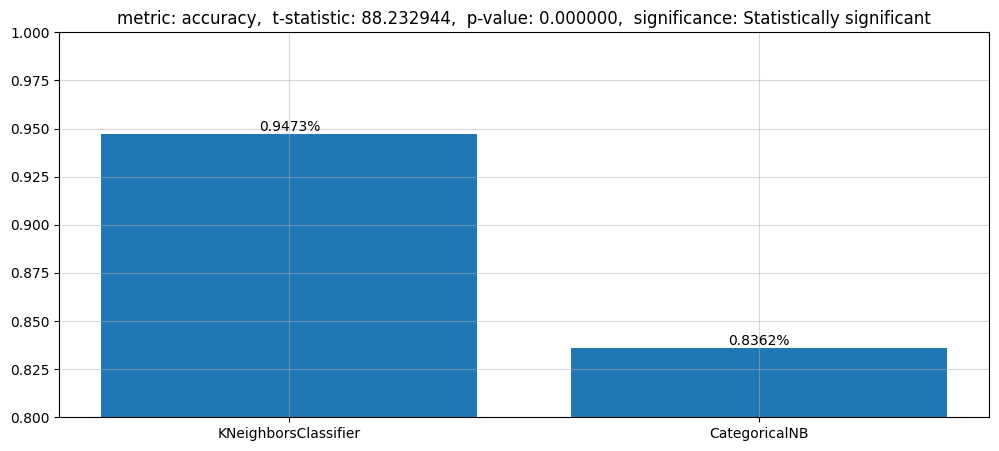

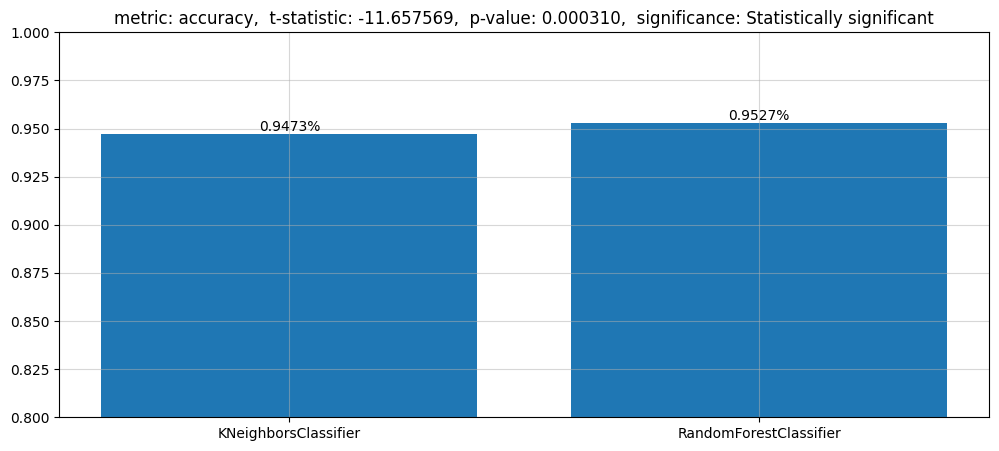

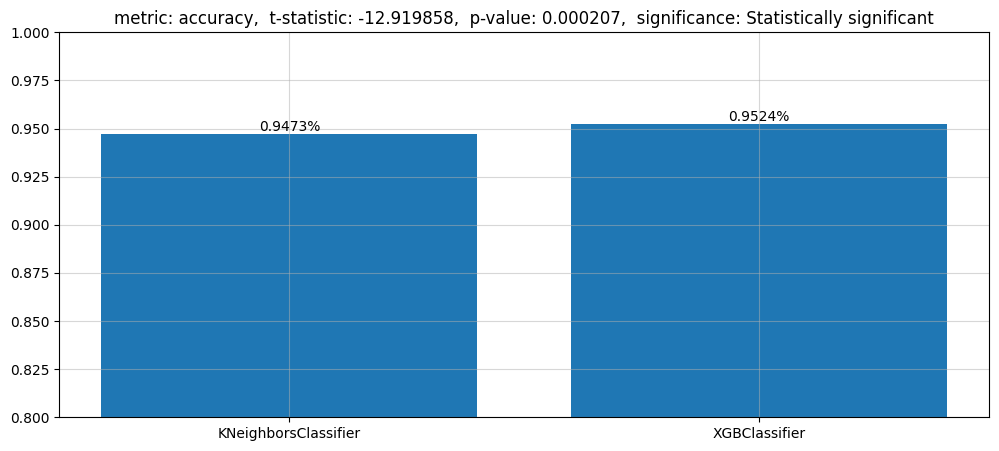

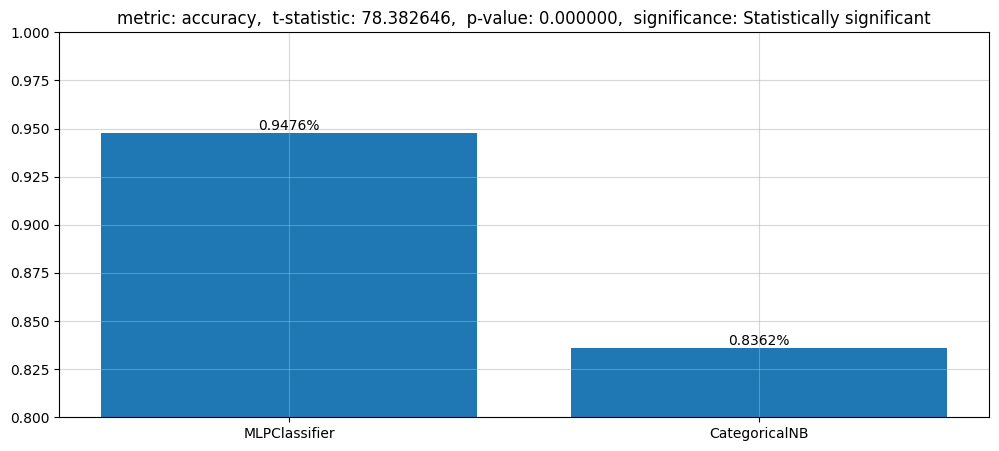

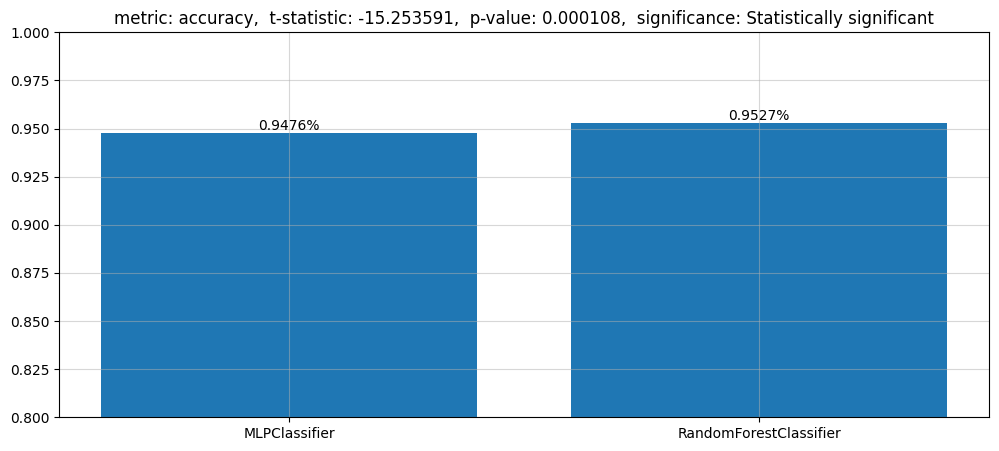

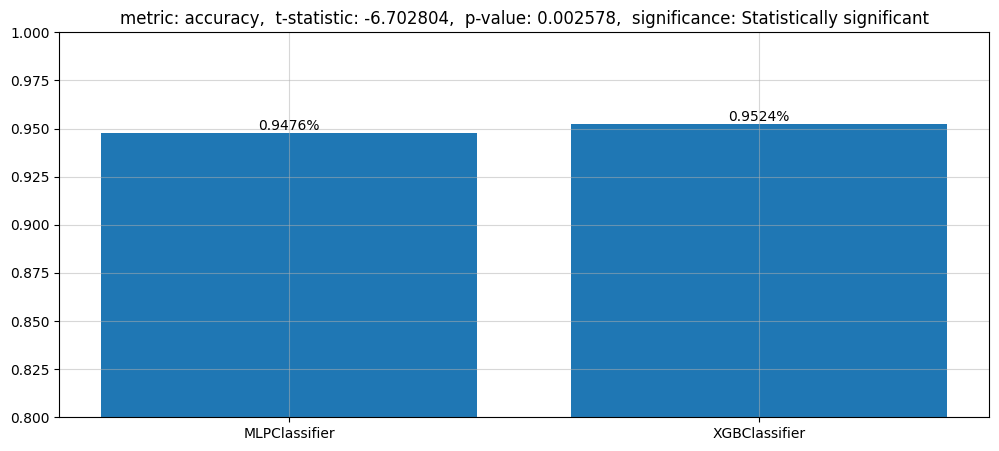

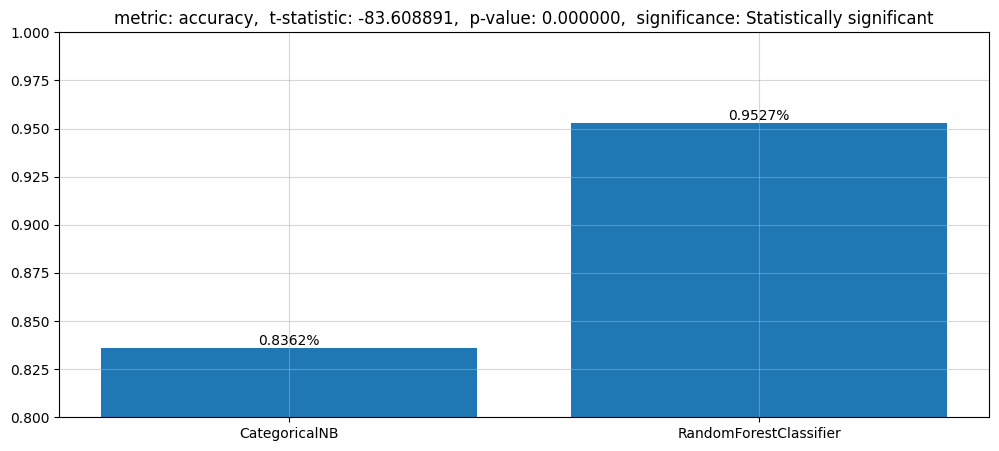

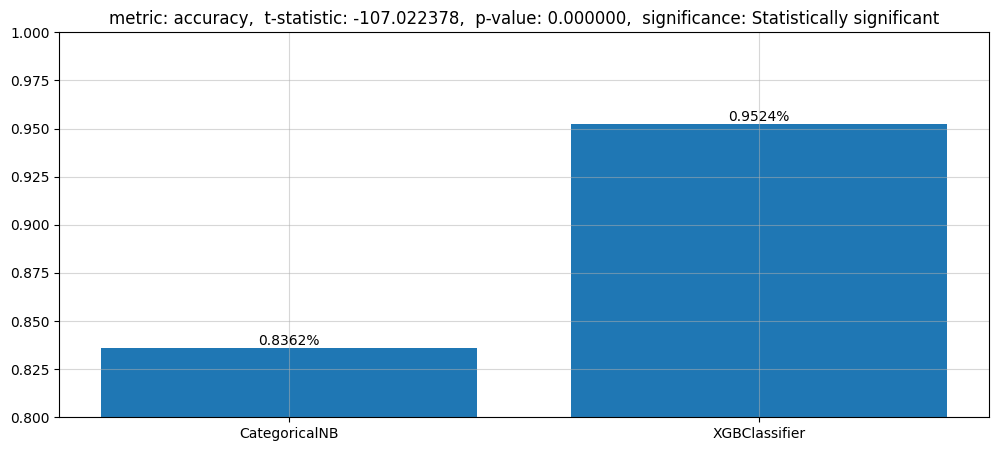

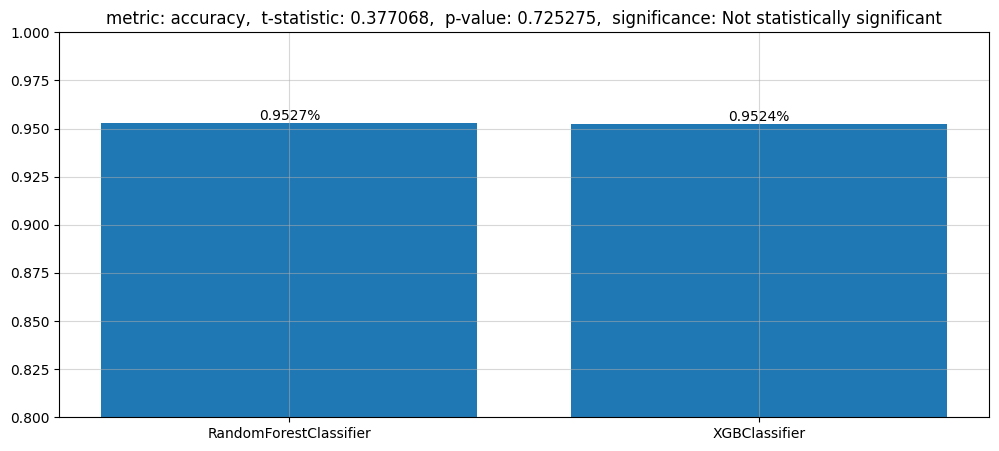

In [ ]:
for t, pair in enumerate(pairs):
  t_result = t_test_scores[t]
  models_to_plot = [model_names[pair[0]], model_names[pair[1]]]
  scores_to_plot = [model_scores[pair[0]].mean(), model_scores[pair[1]].mean()]


  metric = t_result['metric']
  t_statistic = t_result['t_statistic']
  p_value = t_result['p_value']
  significance = t_result['significance']

  plt.figure(figsize=(12,5))
  plt.title(f'metric: {metric},  t-statistic: {t_statistic:.6f},  p-value: {p_value:.6f},  significance: {significance}')
  plt.grid(alpha=0.5)
  plt.ylim(0.8, 1)
  plt.bar(models_to_plot, scores_to_plot)
  for i, s in enumerate(scores_to_plot):
    plt.text(models_to_plot[i], s, f'{s:.4f}%', ha='center', va='bottom')



Kao sto je i ocekivano, *ensemble* modeli ubedljivo vode.  
**RandomForestClassifier** je najbolji, ali nema statisticki bitne razlike u odnosu na **XGBClassifier**.

### Runtime and scalability

In [ ]:
import time

In [ ]:
class_to_num = {'[0, 5000]' : 0, '(5000, 10000]' : 1, '(10000, 15000]' : 2, '15000+' : 3}
num_to_class =  {0 : '[0, 5000]', 1 : '(5000, 10000]', 2 : '(10000, 15000]', 3 :'15000+'}

def to_num(y):
  temp = []
  temp_index = y.index
  for i in y:
    temp.append(class_to_num[i])
  return pd.Series(temp, index=temp_index, name='class')

def to_cat(y):
  temp = []
  temp_index = y.index
  for i in y:
    temp.append(num_to_class[i])
  return pd.Series(temp, index=temp_index, name='class')

In [ ]:
X = X.head(50000)
y = y.head(50000)

In [ ]:
data_x_full = pd.concat([X, X], ignore_index=True)
data_x_full.shape

(100000, 10)

In [ ]:
data_y_full = pd.concat([y, y], ignore_index=True)
data_y_full_encoded = to_num(data_y_full)
data_y_full_encoded.shape

(100000,)

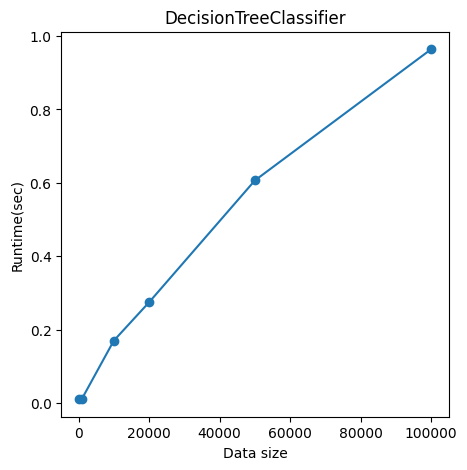

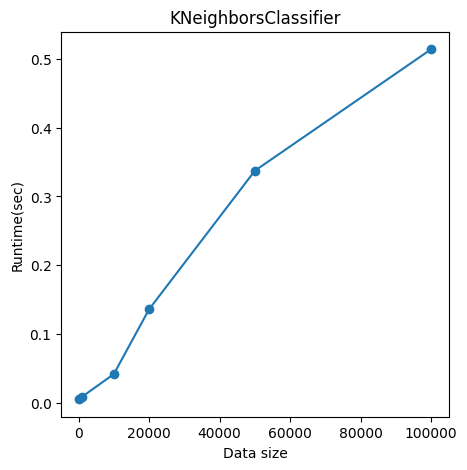

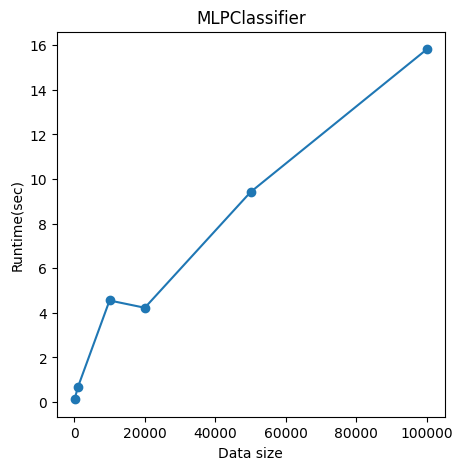

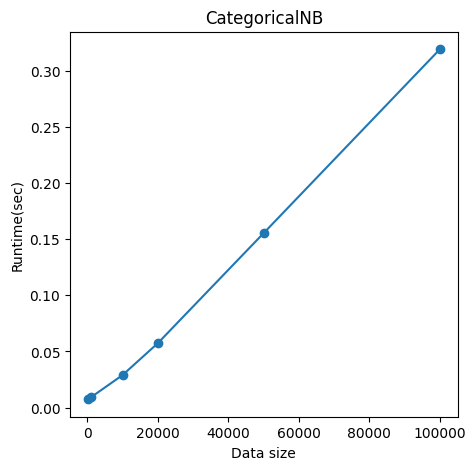

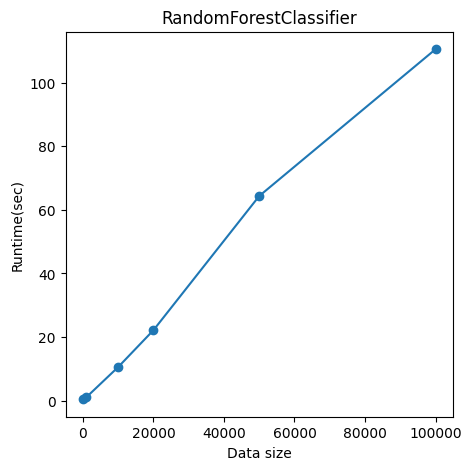

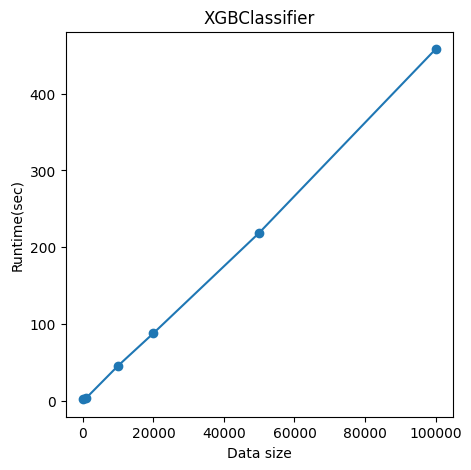

In [ ]:
data_sizes = [100, 1000, 10000, 20000, 50000, 100000]
for i, model in enumerate(models):
  runtimes = []
  for size in data_sizes:
      data_x = data_x_full.head(size)
      data_y = data_y_full.head(size) 
      data_y_encoded = data_y_full_encoded.head(size)
      
      start_time = time.time()
      if model_names[i] == 'XGBClassifier':
        model.fit(data_x, data_y_encoded)
      else:
        model.fit(data_x, data_y)
      end_time = time.time()
      runtime = end_time - start_time

      runtimes.append(runtime)

  plt.figure(figsize=(5, 5))
  plt.plot(data_sizes, runtimes, marker='o')
  plt.title(model_names[i])
  plt.xlabel('Data size')
  plt.ylabel('Runtime(sec)')
  plt.show()

Za treniranje *ensemble* modela je potrebno vise vremena, sto je i ocekivano.  
Mada mozemo primetiti da je za **RandomForestClassifier** potrebno **4 puta manje** vremena nego za **XGBClassifier**.

S toga, model koji se najbolje pokazao na nasem skupu podataka je ubedljivo **RandomForestClassifier**